In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score, classification_report, confusion_matrix
import collections
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

np.random.seed(1337)  # for reproducibility

In [22]:

def load_dataset(file_train, file_validate, file_test):
    df_train = pd.read_excel(file_train,header=None)

    X_train, Y_train = format_data(df_train)

    df_test = pd.read_excel(file_test,header=None)

    X_test, Y_test = format_data(df_test)



    df_validate = pd.read_excel(file_validate,header=None)

    X_validate, Y_validate = format_data(df_validate)



    return X_train, Y_train, X_validate, Y_validate, X_test, Y_test


def format_data(df):
    X = np.array(df.drop(df.columns[-1], 1))


    Y = np.array(df[df.columns[-1]])

    
    Y=Y-1

    return X,Y


In [23]:
train_set_file = 'trainset_P135_60.xls'

validate_set_file = 'cvset_P12345_20.xls'

test_set_file = 'testset_P12345_20.xls'


X_train, Y_train, X_validate, Y_validate, X_test, Y_test = load_dataset(train_set_file, validate_set_file , test_set_file)



In [24]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

print(X_validate.shape)
print(Y_validate.shape)

(19776, 42)
(19776,)
(7040, 42)
(7040,)
(7040, 42)
(7040,)


In [25]:
no_of_classes=np.unique(Y_train).size
no_of_classes

8

# Merging train and dev data

In [26]:
X_train=np.concatenate((X_train, X_validate), axis=0)

In [27]:
X_train.shape

(26816, 42)

In [28]:
Y_train=np.concatenate((Y_train, Y_validate), axis=0)

In [29]:
Y_train.shape

(26816,)

In [30]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(26816, 42)
(26816,)
(7040, 42)
(7040,)


# Feature Scaling

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Grid Search Method

In [11]:
param_grid={'C': [0.1, 1, 100, 1000],'gamma': ['scale','auto', 0.00001, 0.0001, 0.001,0.01,0.1,1,5,10]}

In [12]:
svm_clf=SVC(kernel='rbf')

In [15]:
grid_search = GridSearchCV(svm_clf, param_grid, scoring='accuracy', cv = 5, verbose=5,return_train_score=True)

In [16]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=scale, score=(train=0.979, test=0.936), total=  16.5s
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.5s remaining:    0.0s


[CV]  C=0.1, gamma=scale, score=(train=0.981, test=0.977), total=  13.2s
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  C=0.1, gamma=scale, score=(train=0.981, test=0.977), total=  13.1s
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV]  C=0.1, gamma=scale, score=(train=0.984, test=0.948), total=  12.5s
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s


[CV]  C=0.1, gamma=scale, score=(train=0.983, test=0.970), total=  13.2s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.979, test=0.938), total=  15.0s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.981, test=0.977), total=  13.1s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.981, test=0.977), total=  17.1s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.984, test=0.948), total=  15.4s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.984, test=0.970), total=  13.1s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV]  C=0.1, gamma=1e-05, score=(train=0.126, test=0.126), total= 1.9min
[CV] C=0.1, gamma=1e-05 ............................................

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 302.8min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': ['scale', 'auto', 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [17]:
grid_search.best_score_

0.9888497748054969

In [21]:
grid_search.best_params_

{'C': 100, 'gamma': 'auto'}

# Evaluate the best model

In [12]:
best_svm_clf = SVC(kernel = 'rbf', C = 50, gamma= 0.04, class_weight = 'balanced', random_state = 0)

In [13]:
best_svm_clf.fit(X_train, Y_train)

SVC(C=50, class_weight='balanced', gamma=0.04, random_state=0)

In [14]:
Y_predict = best_svm_clf.predict(X_test)

In [15]:
accuracy_score(Y_test, Y_predict)

0.9914772727272727

In [16]:
accuracy_score(Y_test, Y_predict, normalize=False)

6980

In [17]:
collections.Counter(Y_test)

Counter({0: 879, 1: 888, 2: 878, 3: 897, 4: 874, 5: 883, 6: 898, 7: 843})

In [18]:
confusion_matrix(Y_test, Y_predict)

array([[879,   0,   0,   0,   0,   0,   0,   0],
       [  0, 888,   0,   0,   0,   0,   0,   0],
       [  0,   0, 878,   0,   0,   0,   0,   0],
       [  0,   0,   1, 882,   0,   1,  13,   0],
       [  0,   0,   1,   0, 872,   1,   0,   0],
       [  0,   0,   0,   1,   0, 879,   3,   0],
       [  0,   0,   0,  32,   0,   6, 860,   0],
       [  0,   0,   1,   0,   0,   0,   0, 842]], dtype=int64)

In [19]:
print(classification_report(Y_test, Y_predict, digits=6))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       879
           1   1.000000  1.000000  1.000000       888
           2   0.996595  1.000000  0.998294       878
           3   0.963934  0.983278  0.973510       897
           4   1.000000  0.997712  0.998855       874
           5   0.990981  0.995470  0.993220       883
           6   0.981735  0.957684  0.969560       898
           7   1.000000  0.998814  0.999407       843

    accuracy                       0.991477      7040
   macro avg   0.991656  0.991620  0.991606      7040
weighted avg   0.991519  0.991477  0.991466      7040



In [20]:
Y_scores=cross_val_predict(best_svm_clf,X_train,Y_train,cv=5,method='decision_function',n_jobs=-1, verbose=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.0s remaining:   19.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s finished


In [21]:
Y_scores[0:4]

array([[ 7.28941327,  2.8086954 ,  6.22031937,  1.78440461,  5.17213662,
         1.75536232,  1.77907888,  0.78987867],
       [ 7.28848567,  1.76749594,  6.27520048,  3.82301002,  5.03091567,
         1.74694643,  0.76968526,  0.76348136],
       [ 7.30466067,  1.7524417 ,  6.2440523 ,  3.92199857,  5.16597504,
         1.72309466,  0.74176645,  0.75407912],
       [ 7.30022679,  0.7150071 ,  6.28705805,  4.24970753,  5.21283861,
         1.71762586,  2.73839864, -0.27722142]])

In [26]:
recall_score(Y_test, Y_predict,average=None)

array([1.        , 1.        , 1.        , 0.98550725, 0.99885584,
       0.99660249, 0.95879733, 0.99881376])

# OVR mode evaluation of best selected model

In [42]:
ovr_svm_clf = OneVsRestClassifier(SVC(kernel = 'rbf', C = 1, gamma= 0.04, class_weight = 'balanced', random_state = 0,  probability=True))

In [43]:
ovr_svm_clf.fit(X_train, Y_train)

OneVsRestClassifier(estimator=SVC(C=1, class_weight='balanced', gamma=0.04,
                                  probability=True, random_state=0))

In [44]:
Y_predict = ovr_svm_clf.predict(X_test)

In [45]:
acc=accuracy_score(Y_test, Y_predict)
print(acc)

0.9884943181818182


In [46]:
Y_score = ovr_svm_clf.predict_proba(X_test)

In [47]:
Y_score.shape

(7040, 8)

In [48]:
Y_test_bin= label_binarize(Y_test, classes=[*range(no_of_classes)])

In [49]:
Y_test_bin.shape

(7040, 8)

In [50]:
Y_test_bin[0:5]

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0]])

range(0, 8)


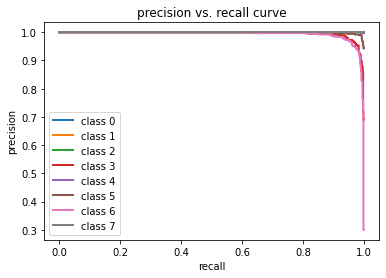

In [51]:
# precision recall curve
precision = dict()
recall = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_bin[:,i],Y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

range(0, 8)


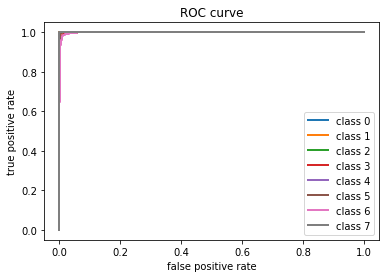

In [52]:
# roc curve
fpr = dict()
tpr = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i],Y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

# Model testing

In [21]:
best_svm_clf = SVC(kernel = 'rbf', C = 10, gamma= 0.01, class_weight = 'balanced', random_state = 0)

In [22]:
best_svm_clf.fit(X_train, Y_train)

SVC(C=10, class_weight='balanced', gamma=0.01, random_state=0)

In [23]:
Y_predict = best_svm_clf.predict(X_test)

In [24]:
accuracy_score(Y_test, Y_predict)

0.9896306818181818